# EDA 

## COVID 19 Data Analysis

#### By Shahil

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("covid19_Confirmed_dataset.csv")

In [13]:
dataset.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [14]:
dataset.shape

(266, 102)

In [16]:
#delete useless columns
df = dataset.drop(["Province/State"],axis = 1, inplace = True)
dataset.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,Albania,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,Algeria,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,Andorra,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,Angola,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [17]:
#aggrigate the rows by country
corona_dataset_aggregated = dataset.groupby("Country/Region").sum()
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [18]:
corona_dataset_aggregated.shape

(187, 100)

In [20]:
#visualiẻ the data related to the country
corona_dataset_aggregated.loc["China"]

1/22/20      548
1/23/20      643
1/24/20      920
1/25/20     1406
1/26/20     2075
           ...  
4/26/20    83912
4/27/20    83918
4/28/20    83940
4/29/20    83944
4/30/20    83956
Name: China, Length: 100, dtype: int64

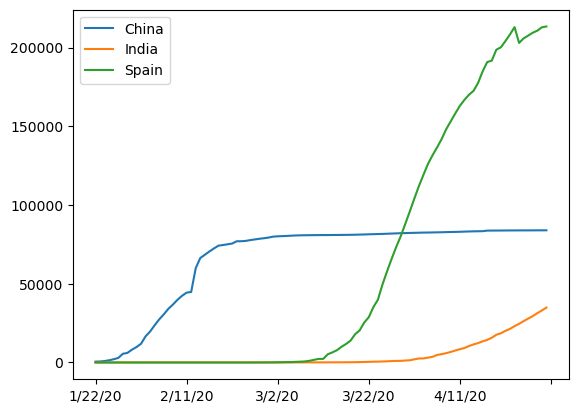

In [23]:
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["India"].plot()
corona_dataset_aggregated.loc["Spain"].plot()
plt.legend()

<Axes: >

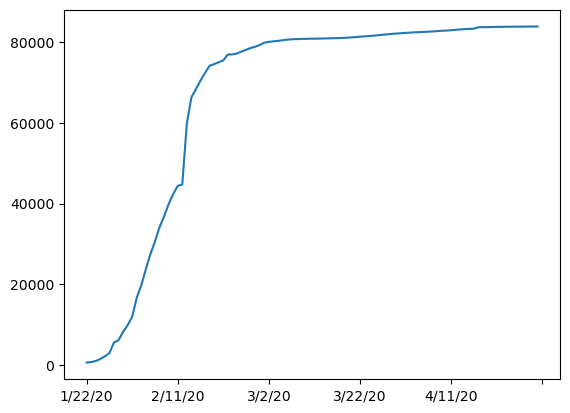

In [24]:
#Caclculate the good measures
corona_dataset_aggregated.loc["China"].plot()


<Axes: >

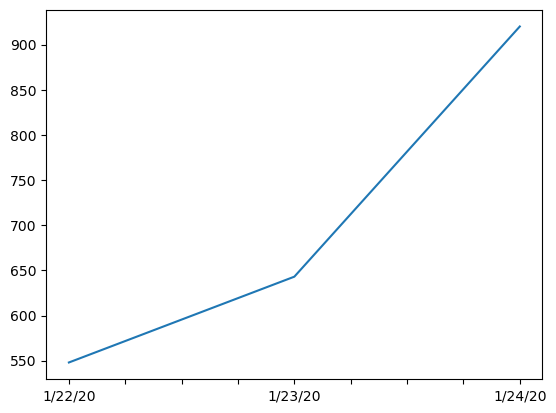

In [25]:
#spread of corona for the first three days 
corona_dataset_aggregated.loc["China"][:3].plot()


<Axes: >

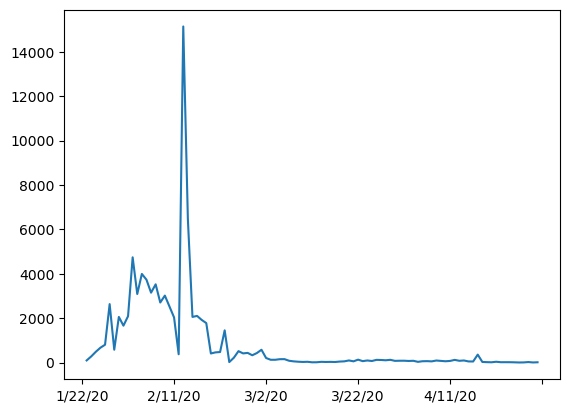

In [26]:
#calculate the first derivative of the curve
corona_dataset_aggregated.loc["China"].diff().plot()


In [27]:
#maximum infection rate
corona_dataset_aggregated.loc["China"].diff().max()


15136.0

In [30]:
corona_dataset_aggregated.loc["India"].diff().max()



1893.0

In [31]:
corona_dataset_aggregated.loc["Spain"].diff().max()

9630.0

In [32]:
#to make the list of all the countries with max infection rate
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []

for c in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["Max_infection_rates"] = max_infection_rates
    

In [33]:
#there will be a new clm created named Max infection rate at the last
corona_dataset_aggregated

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


In [34]:
#create a new Data Frame
corona_data = pd.DataFrame(corona_dataset_aggregated["Max_infection_rates"])
corona_data

,Max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


In [35]:
#mporting Data set 2 

## WORLD HAPPINESS REPORT

In [36]:
happiness_report = pd.read_csv("worldwide_happiness_report.csv")

In [37]:
happiness_report

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [38]:
#drop useless columns
happiness_report.drop(["Overall rank", "Score", "Generosity","Perceptions of corruption"],axis = 1, inplace = True)
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [40]:
happiness_report.set_index("Country or region",inplace = True)
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


## JOIN THE TWO DATASET

In [41]:
corona_data.shape

(187, 1)

In [42]:
happiness_report.shape

(156, 4)

In [43]:
data = corona_data.join(happiness_report, how = "inner")
data

,Max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,29.0,0.960,1.427,0.805,0.154
Vietnam,19.0,0.741,1.346,0.851,0.543
Yemen,5.0,0.287,1.163,0.463,0.143
Zambia,9.0,0.578,1.058,0.426,0.431


In [44]:
data.corr()

,Max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_infection_rates,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


Text(0.5, 1.0, 'Log Infection Rate vs GDP per Capita')

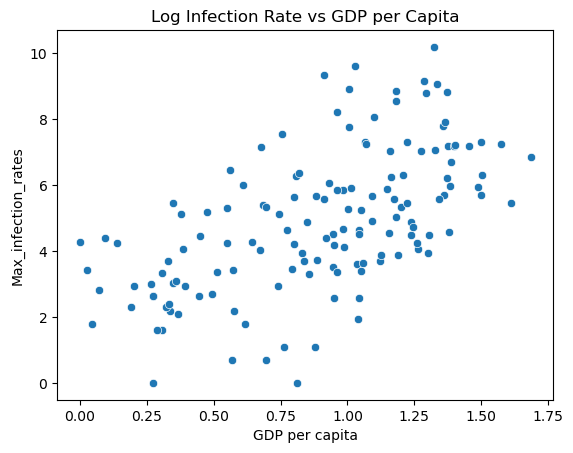

In [50]:
#plotting the graph - visualization
x = data["GDP per capita"]
y = data["Max_infection_rates"]
sns.scatterplot(x=x,y=np.log(y))
plt.title("Log Infection Rate vs GDP per Capita")

<Axes: xlabel='GDP per capita', ylabel='Max_infection_rates'>

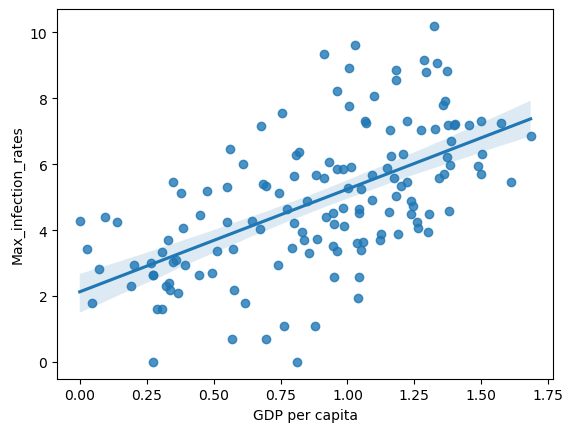

In [52]:
#Regression plot
sns.regplot(x=x, y=np.log(y))
plt.title("Log Infection Rate vs GDP per Capita")

Text(0.5, 1.0, 'Log Infection Rate vs Socail support')

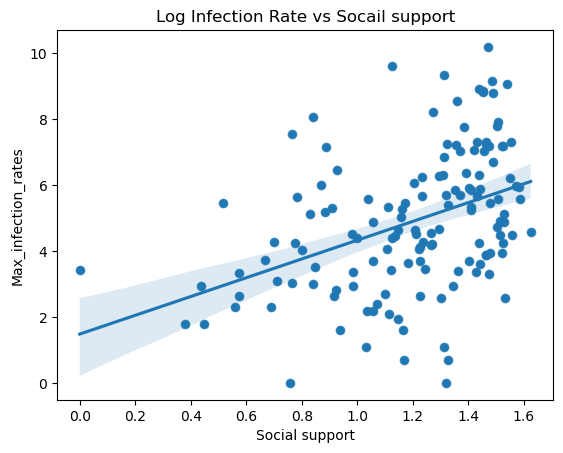

In [60]:
#plot between socail support amd Max infection rate
x = data["Social support"]
y = data["Max_infection_rates"]
sns.scatterplot(x=x,y=np.log(y))
sns.regplot(x=x, y=np.log(y))
plt.title("Log Infection Rate vs Socail support")

Text(0.5, 1.0, 'Log Infection Rate vs Healthy life expectancy')

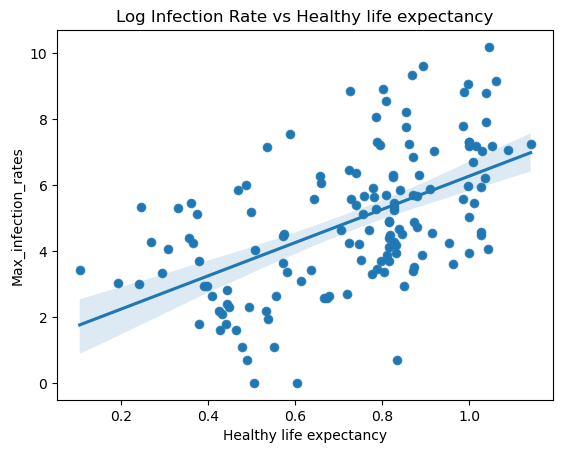

In [61]:
x = data["Healthy life expectancy"]
y = data["Max_infection_rates"]
sns.scatterplot(x=x,y=np.log(y))
sns.regplot(x=x, y=np.log(y))
plt.title("Log Infection Rate vs Healthy life expectancy")

Text(0.5, 1.0, 'Log Infection Rate vs Freedom to make life choices')

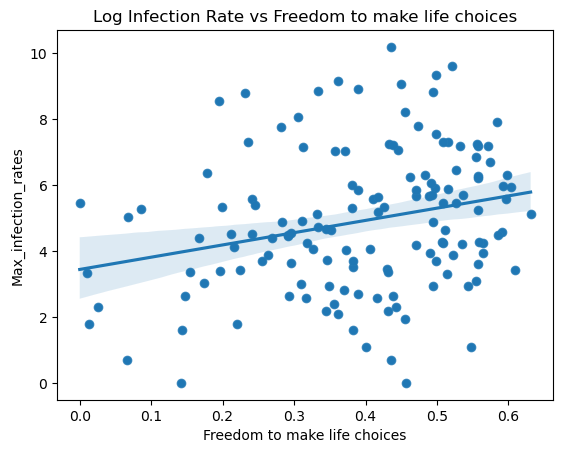

In [62]:
x = data["Freedom to make life choices"]
y = data["Max_infection_rates"]
sns.scatterplot(x=x,y=np.log(y))
sns.regplot(x=x, y=np.log(y))
plt.title("Log Infection Rate vs Freedom to make life choices")